In [136]:
ReloadProject('deep_learning')

notebook_init.py imported and reloaded
forwarded symbol: Activation
forwarded symbol: Dense
forwarded symbol: Dict
forwarded symbol: InputLayer
forwarded symbol: List
forwarded symbol: Model
forwarded symbol: Sequential
forwarded symbol: Tuple
reloaded: gym
forwarded symbol: gym
reloaded: keras
forwarded symbol: keras
reloaded: openai_wrapper
forwarded symbol: openai_wrapper
reloaded: q_learning
forwarded symbol: q_learning
reloaded: q_learning_impl
forwarded symbol: q_learning_impl
reloaded: q_learning_impl_v2
forwarded symbol: q_learning_impl_v2
reloaded: q_learning_v2
forwarded symbol: q_learning_v2


## Try out the enviroments

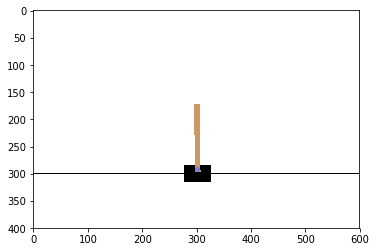

CPU times: user 2.66 s, sys: 77.7 ms, total: 2.73 s
Wall time: 3.02 s


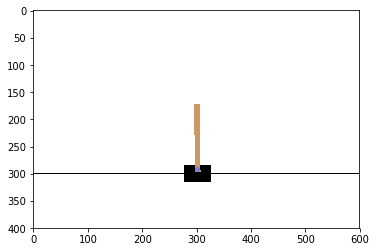

In [56]:
%%time

env = gym.make('CartPole-v1')
env.reset()
for _ in range(10):
    plt.imshow(env.render(mode='rgb_array'))
    display.clear_output(wait=True)
    display.display(plt.gcf())
    env.step(env.action_space.sample())

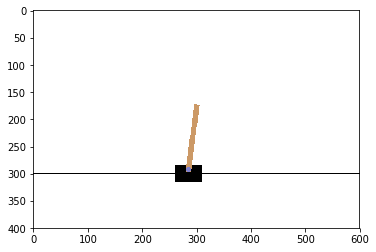

CPU times: user 2.53 s, sys: 53 ms, total: 2.58 s
Wall time: 2.82 s


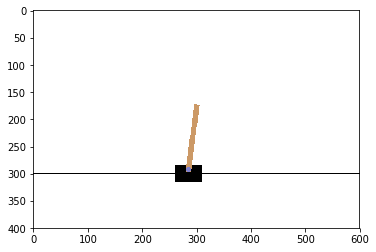

In [77]:
%%time

env = openai_wrapper.GymEnvironment(gym.make('CartPole-v1'))
for ii in range(10):
    env.PlotState()
    env.TakeAction(np.random.randint(2))

## Learning

In [ ]:
%%time

env = openai_wrapper.GymEnvironment(gym.make('CartPole-v1'))
env.ChangeSettings(continue_from_done = True, reward_when_done = -10.0)

qfunc = q_learning_impl_v2.MultiModelQFunction(
    env, (), (20, 20, 20), learning_rate=0.9, discount_factor=0.95)
policy = q_learning_impl_v2.MaxValueWithRandomnessPolicy(certainty = 0.95)

# Train.
q_learning_v2.Run(env=env, qfunc=qfunc, policy=policy, num_of_runs=20, debug_verbosity=0)

# Test.
q_learning_v2.Run(env=env, qfunc=qfunc, policy=policy, num_of_runs=20, debug_verbosity=9)

In [129]:
env = openai_wrapper.GymEnvironment(gym.make('CartPole-v1'))
env.continue_from_done = True
q_learning_v2.Run(env=env, qfunc=qfunc, policy=policy, num_of_runs=40, debug_verbosity=2)

<use random choice>
Action 1: ([0. 0. 0. 0.]) -> ([ 0.02014217  0.17034211 -0.03983822 -0.34617961]), reward: 1.0
Action 1: ([ 0.02014217  0.17034211 -0.03983822 -0.34617961]) -> ([ 0.02354901  0.36600743 -0.04676181 -0.65115406]), reward: 1.0
Action 0: ([ 0.02354901  0.36600743 -0.04676181 -0.65115406]) -> ([ 0.03086916  0.17156689 -0.05978489 -0.37355503]), reward: 1.0
Action 0: ([ 0.03086916  0.17156689 -0.05978489 -0.37355503]) -> ([ 0.0343005  -0.0226571  -0.06725599 -0.10030583]), reward: 1.0
Action 0: ([ 0.0343005  -0.0226571  -0.06725599 -0.10030583]) -> ([ 0.03384736 -0.21675393 -0.06926211  0.17042282]), reward: 1.0
Action 0: ([ 0.03384736 -0.21675393 -0.06926211  0.17042282]) -> ([ 0.02951228 -0.41081968 -0.06585365  0.44047671]), reward: 1.0
Action 1: ([ 0.02951228 -0.41081968 -0.06585365  0.44047671]) -> ([ 0.02129589 -0.21483058 -0.05704412  0.1277833 ]), reward: 1.0
Action 0: ([ 0.02129589 -0.21483058 -0.05704412  0.1277833 ]) -> ([ 0.01699927 -0.40909091 -0.05448845  0.